AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  D 		  R
-------------------------------------
| 5.0 		 0.23 		 0.22 |
| 5.0 		 0.49 		 0.19 |
| 5.0 		 0.22 		 0.27 |
| 5.0 		 0.41 		 0.17 |
| 5.0 		 0.28 		 0.2 |
| 5.0 		 0.26 		 0.29 |
| 5.0 		 0.85 		 0.27 |
| 5.0 		 0.44 		 0.33 |
| 5.0 		 0.22 		 0.3 |
| 5.0 		 0.6 		 0.36 |
| 5.0 		 0.27 		 0.17 |
| 5.0 		 0.26 		 0.45 |
| 5.0 		 0.21 		 0.17 |
| 5.0 		 0.77 		 0.17 |
| 5.0 		 0.27 		 0.72 |
| 5.0 		 0.23 		 0.22 |
| 5.0 		 0.36 		 0.63 |
| 5.0 		 0.21 		 0.35 |
| 5.0 		 0.22 		 0.59 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of D is: 0.21
The s.d. of R is: 0.19
-------------------------------------
The mean of M is: 5.0
The mean of D is: 0.35
The mean of R is: 0.4
-------------------------------------


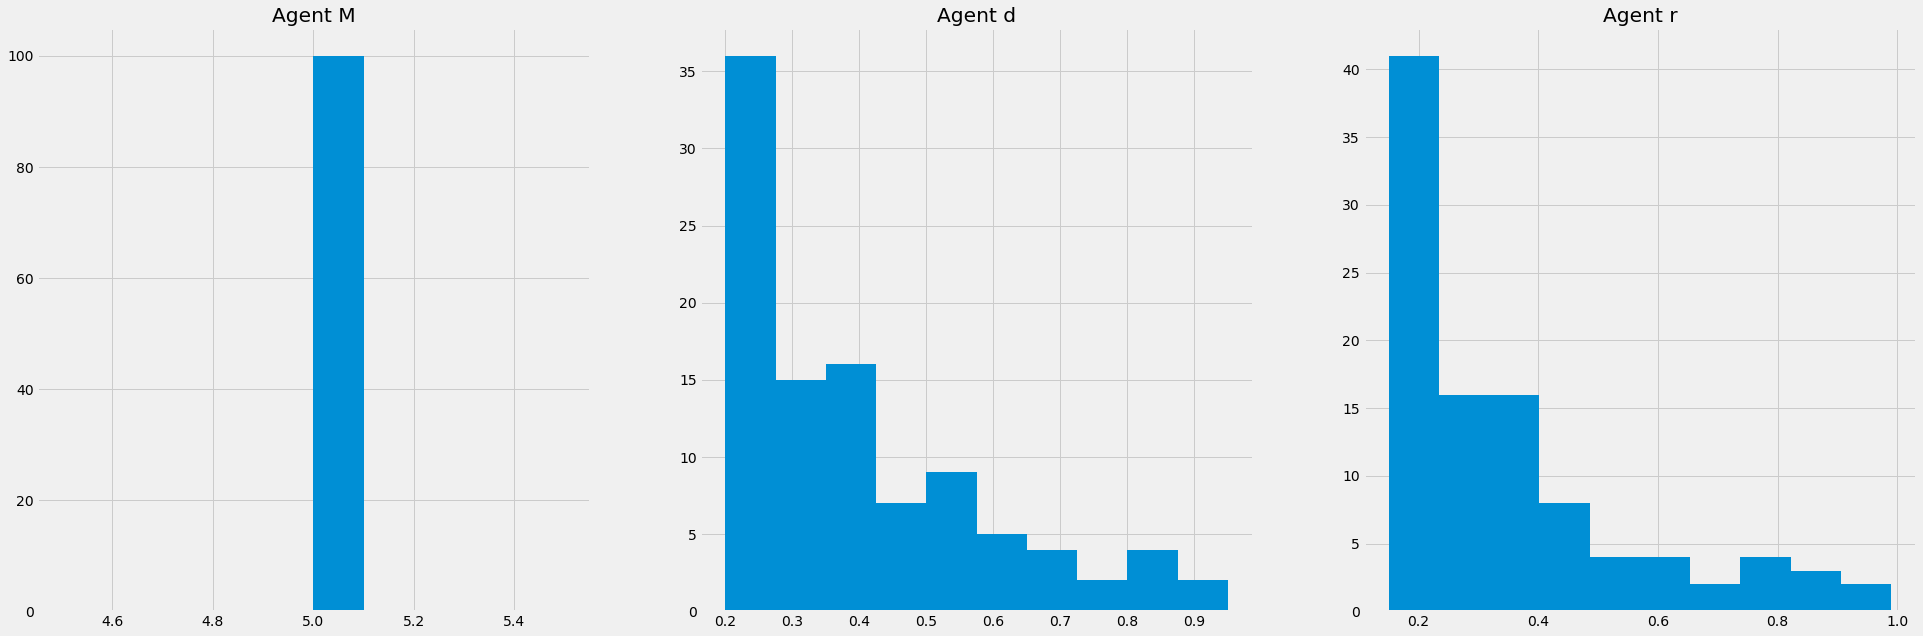

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 2.2, Temptation: 3.4, Sucker: 0, Punishment: 1.1
Agent 1 playing Agent 0: Reward: 3.4, Temptation: 4.4, Sucker: 0, Punishment: 1.0
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 2.2, Temptation: 3.4, Sucker: 0, Punishment: 1.1
Agent 2 playing Agent 0: Reward: 2.4, Temptation: 3.8, Sucker: 0, Punishment: 1.4
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 2.2, Temptation: 3.4, Sucker: 0, Punishment: 1.1
Agent 3 playing Agent 0: Reward: 2.9, Temptation: 3.8, Sucker: 0, Punishment: 0.8
____________________________________________________________________________________________________
Agent 0 playing Agent 4: Reward: 2.2, Temptation: 3.4, Sucker: 0, Punishment: 1.1
Agent 4 playing Agent 

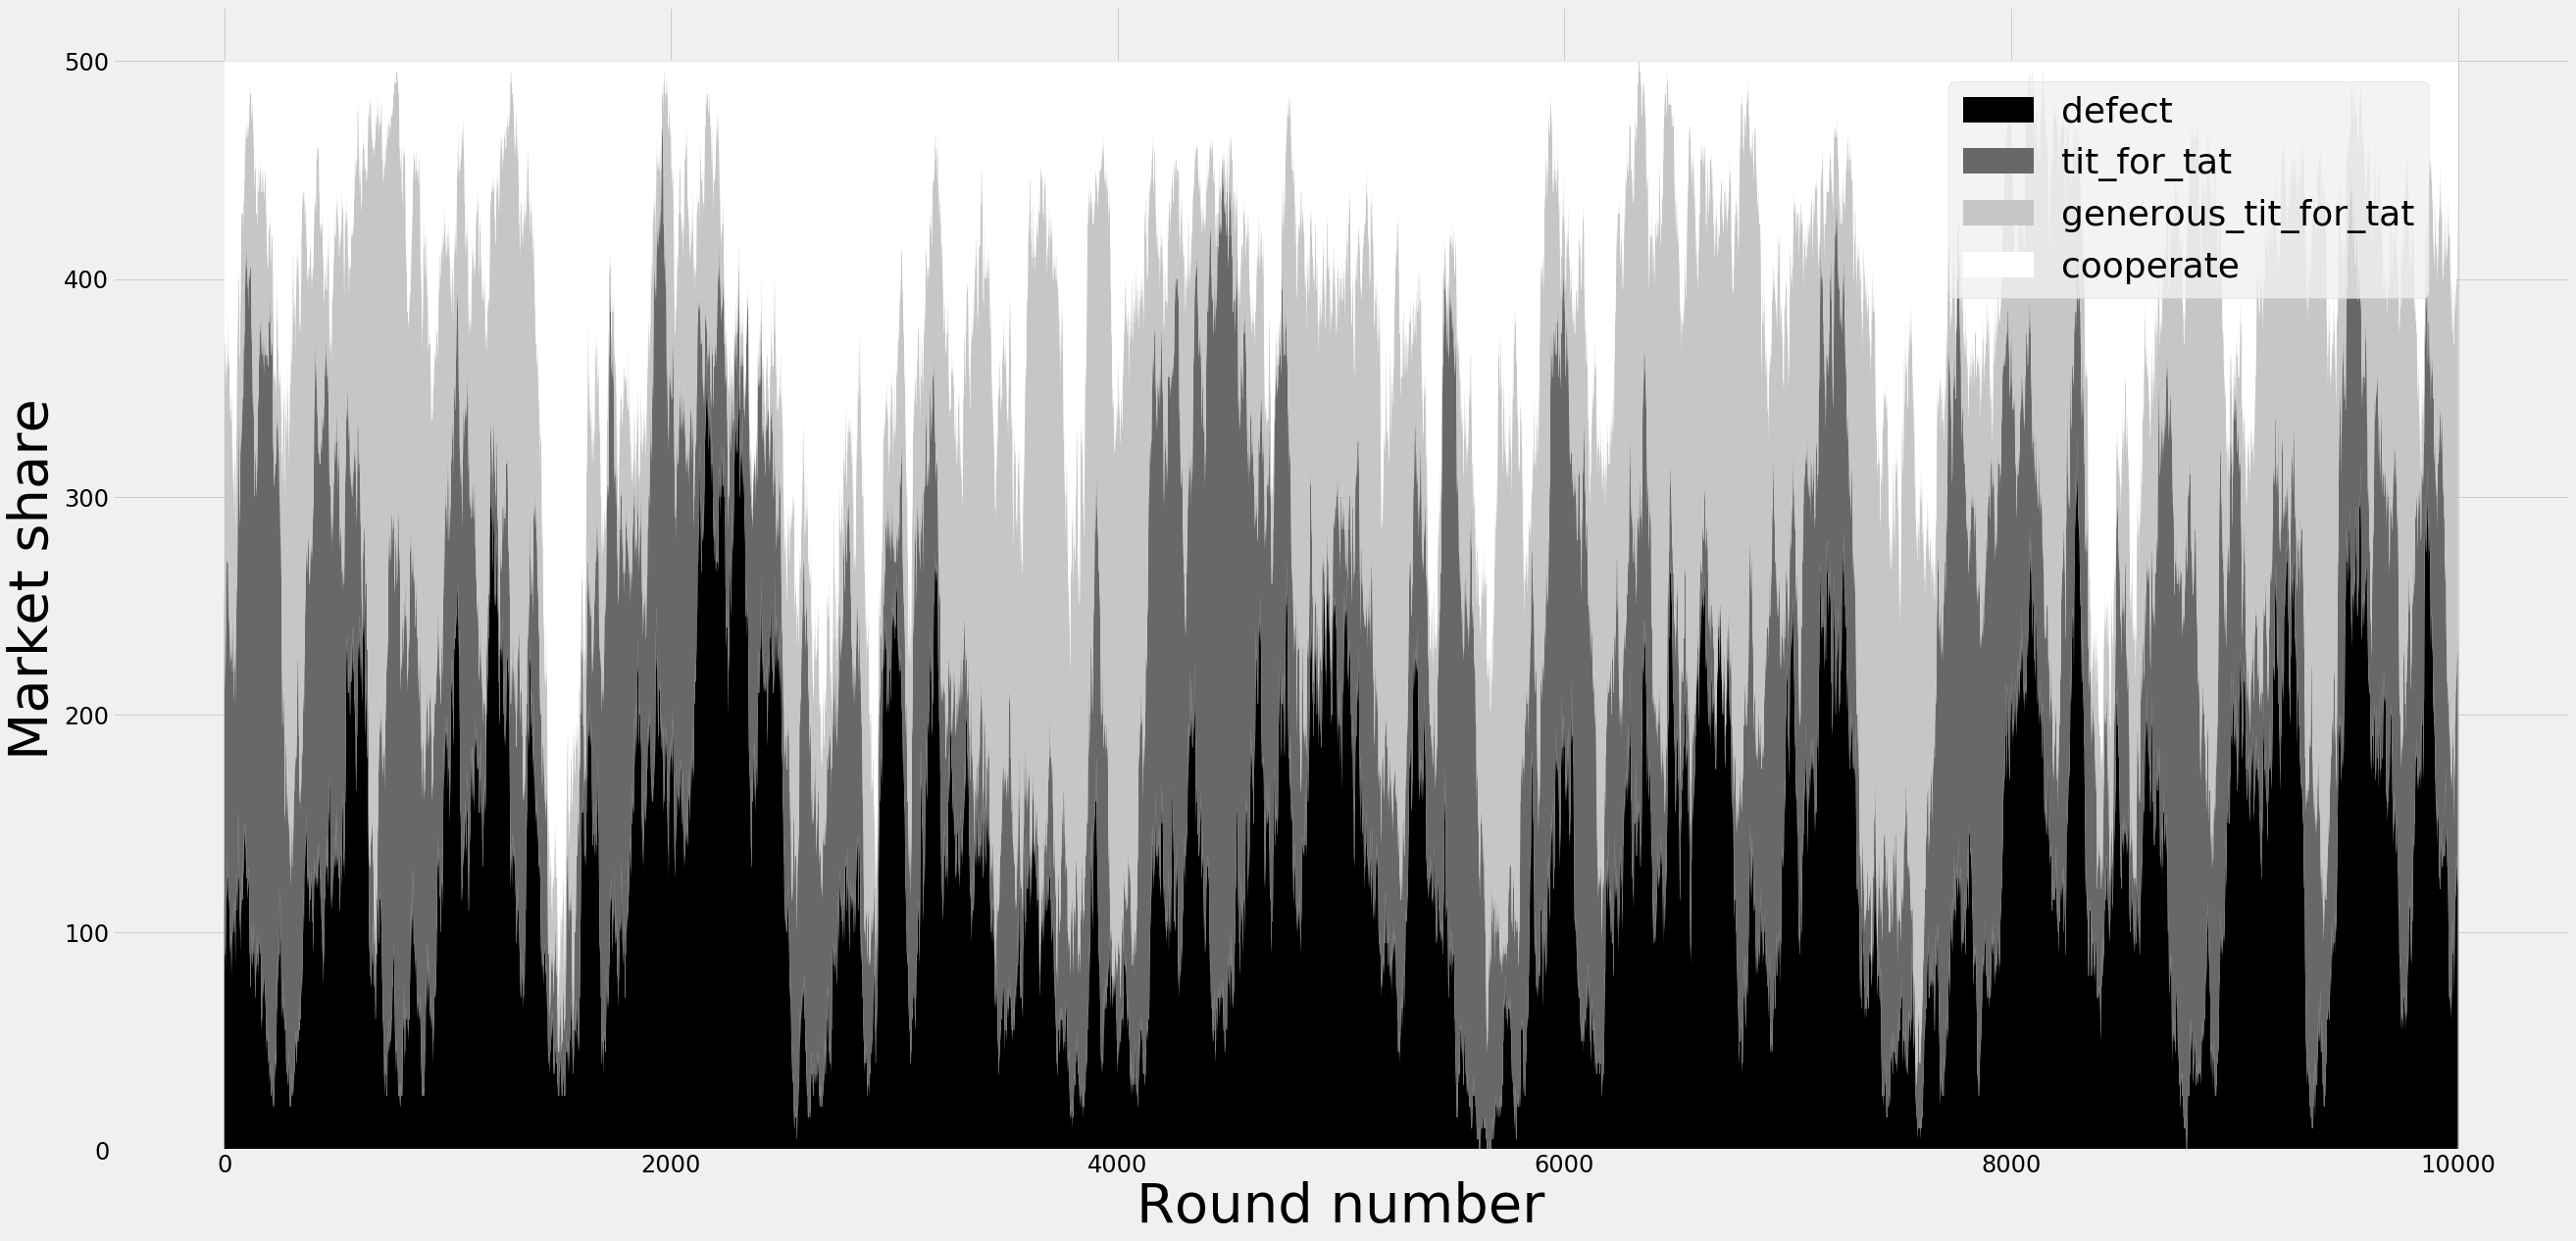

In [ ]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

tour_type = "pareto_dr_min"
M = [5, 1/10000]
R = ['power', 0.15, 1]
D = ['power', 0.2, 1]

agents = get_agents(homogenous = False, M = M, R = R, D = D)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data/outliers/" + str(seed) + "_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, seed = str(seed), tour_type = tour_type)